In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/train.zip")
test = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/test.zip")



In [3]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  


In [6]:
#Count the number of duplicated rows
df.duplicated().sum()

0

In [7]:
#Count the number of NaN values for each column
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


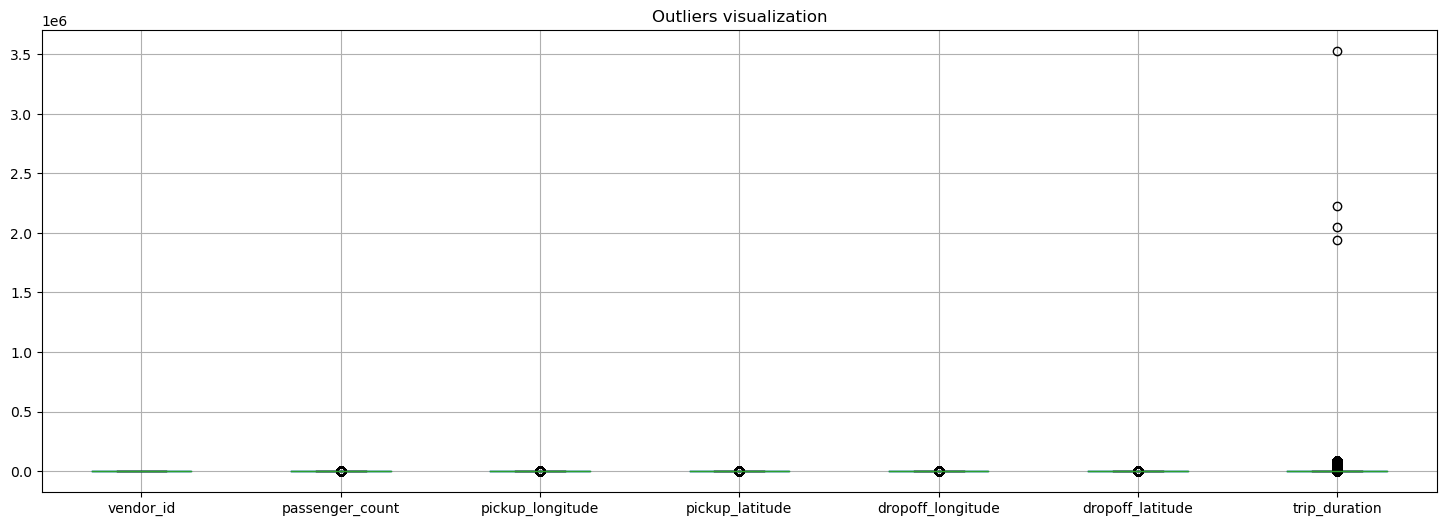

In [9]:
#Visualize univariate outliers
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot();

In [10]:
#Only keep trips that lasted less than 5900 seconds
df = df[(df.trip_duration < 5900)]

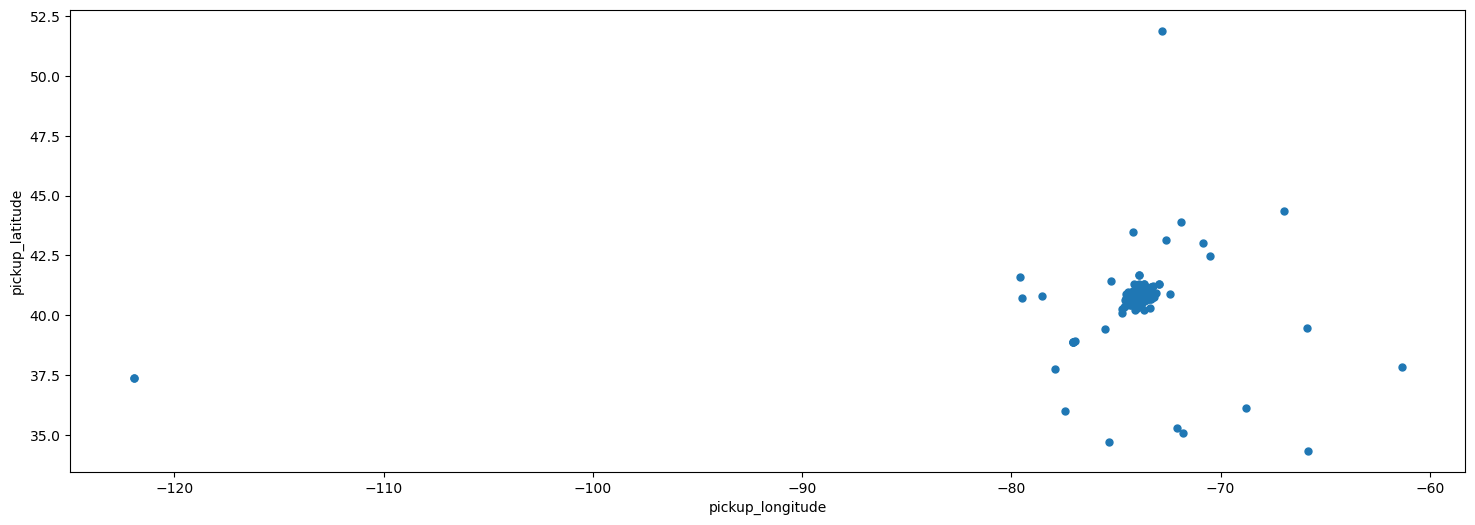

In [11]:
#Plot pickup positions to visualize outliers
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

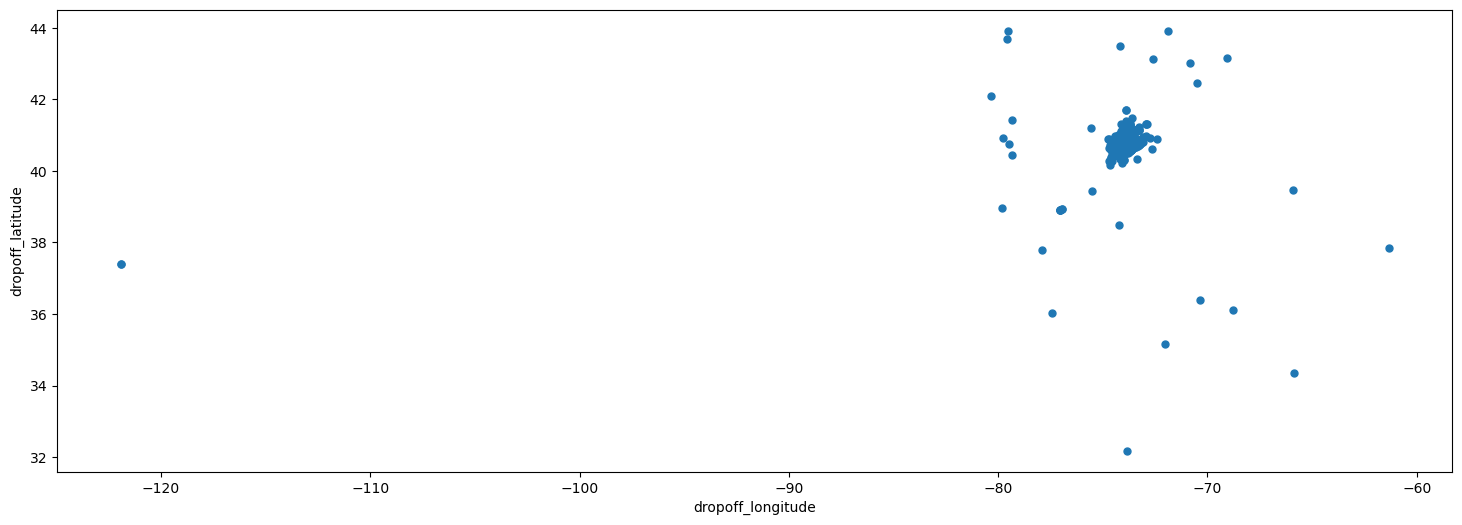

In [12]:
#Plot dropoff positions to visualize outliers
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [13]:
#Remove position outliers
df = df[(df.pickup_longitude > -100)]
df = df[(df.pickup_latitude < 50)]
#df = df[(df.dropoff_longitude < -70) & (df.dropoff_longitude > -80)]
#df = df[(df.dropoff_latitude < 50)]

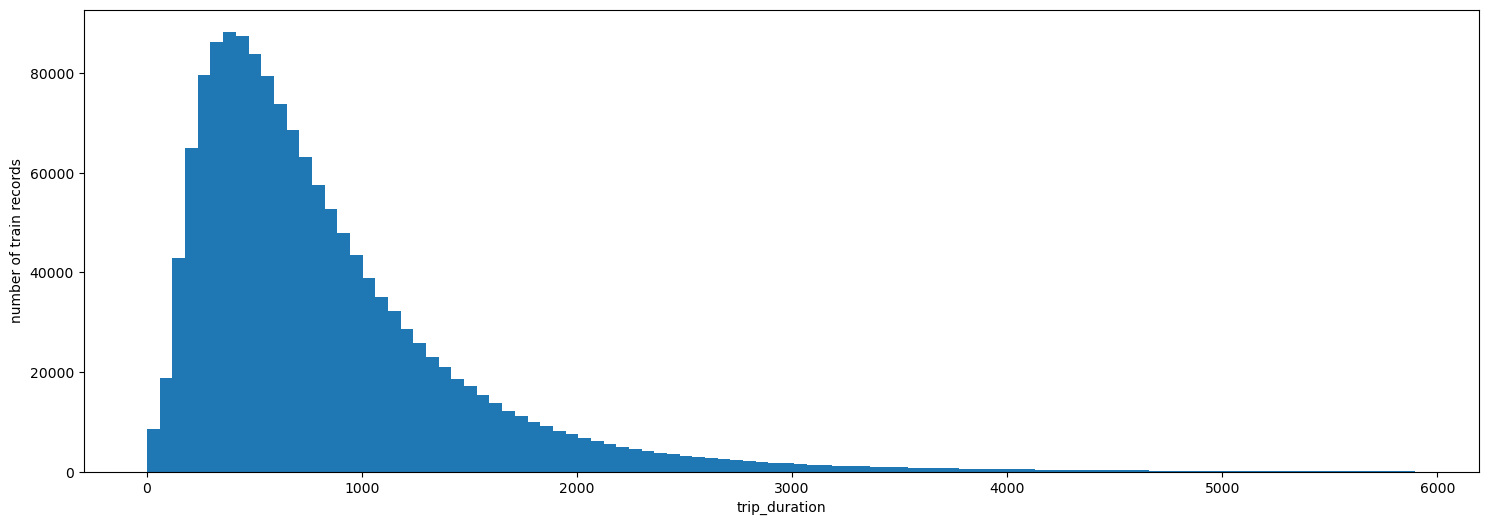

In [14]:
#Visualize the distribution of trip_duration values
plt.subplots(figsize=(18,6))
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

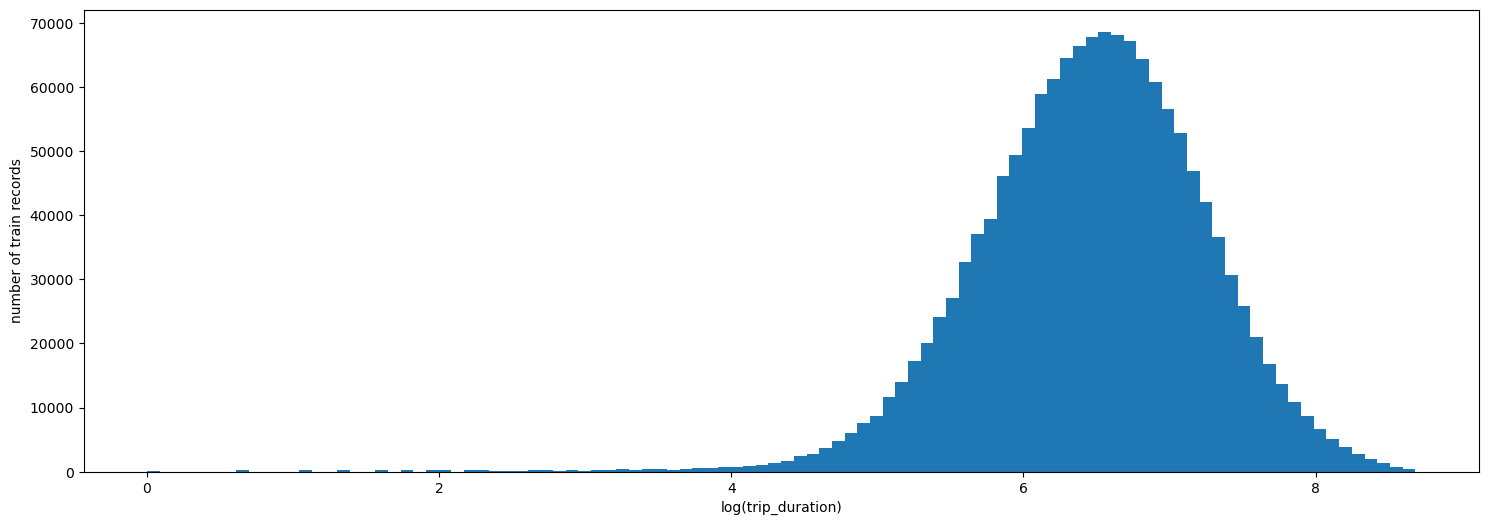

In [15]:
#Log-transformation
plt.subplots(figsize=(18,6))
df['trip_duration'] = np.log(df['trip_duration'].values)
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()


In [16]:
#One-hot encoding binary categorical features
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

df.drop(['vendor_id'], axis=1, inplace=True)

In [17]:
print(df)

                id      pickup_datetime     dropoff_datetime  passenger_count  \
0        id2875421  2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1        id2377394  2016-06-12 00:43:35  2016-06-12 00:54:38                1   
2        id3858529  2016-01-19 11:35:24  2016-01-19 12:10:48                1   
3        id3504673  2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4        id2181028  2016-03-26 13:30:55  2016-03-26 13:38:10                1   
...            ...                  ...                  ...              ...   
1458639  id2376096  2016-04-08 13:31:04  2016-04-08 13:44:02                4   
1458640  id1049543  2016-01-10 07:35:15  2016-01-10 07:46:10                1   
1458641  id2304944  2016-04-22 06:57:41  2016-04-22 07:10:25                1   
1458642  id2714485  2016-01-05 15:56:26  2016-01-05 16:02:39                1   
1458643  id1209952  2016-04-05 14:44:25  2016-04-05 14:47:43                1   

         pickup_longitude  

In [18]:
#Datetyping the dates
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

df.drop(['dropoff_datetime'], axis=1, inplace=True) #as we don't have this feature in the testset

#Date features creations and deletions
df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.week
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['minute_oftheday'] = df['hour'] * 60 + df['minute']
df.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

df.drop(['pickup_datetime'], axis=1, inplace=True)

df.info()

/tmp/ipykernel_20/758064654.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.pickup_datetime.dt.week
/tmp/ipykernel_20/758064654.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week'] = test.pickup_datetime.dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456013 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1456013 non-null  object 
 1   passenger_count    1456013 non-null  int64  
 2   pickup_longitude   1456013 non-null  float64
 3   pickup_latitude    1456013 non-null  float64
 4   dropoff_longitude  1456013 non-null  float64
 5   dropoff_latitude   1456013 non-null  float64
 6   trip_duration      1456013 non-null  float64
 7   N                  1456013 non-null  uint8  
 8   Y                  1456013 non-null  uint8  
 9   1                  1456013 non-null  uint8  
 10  2                  1456013 non-null  uint8  
 11  month              1456013 non-null  int64  
 12  week               1456013 non-null  int64  
 13  weekday            1456013 non-null  int64  
 14  hour               1456013 non-null  int64  
 15  minute_oftheday    1456013 non-n

In [19]:
print(df)

                id  passenger_count  pickup_longitude  pickup_latitude  \
0        id2875421                1        -73.982155        40.767937   
1        id2377394                1        -73.980415        40.738564   
2        id3858529                1        -73.979027        40.763939   
3        id3504673                1        -74.010040        40.719971   
4        id2181028                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639  id2376096                4        -73.982201        40.745522   
1458640  id1049543                1        -74.000946        40.747379   
1458641  id2304944                1        -73.959129        40.768799   
1458642  id2714485                1        -73.982079        40.749062   
1458643  id1209952                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  N  Y  1  2  \
0               -73.964630         4

In [20]:
#Function aiming at calculating distances from coordinates
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
df['distance'] = ft_haversine_distance(df['pickup_latitude'].values,
                                                 df['pickup_longitude'].values, 
                                                 df['dropoff_latitude'].values,
                                                 df['dropoff_longitude'].values)
test['distance'] = ft_haversine_distance(test['pickup_latitude'].values, 
                                                test['pickup_longitude'].values, 
                                                test['dropoff_latitude'].values, 
                                                test['dropoff_longitude'].values)

In [21]:
print(df)

                id  passenger_count  pickup_longitude  pickup_latitude  \
0        id2875421                1        -73.982155        40.767937   
1        id2377394                1        -73.980415        40.738564   
2        id3858529                1        -73.979027        40.763939   
3        id3504673                1        -74.010040        40.719971   
4        id2181028                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639  id2376096                4        -73.982201        40.745522   
1458640  id1049543                1        -74.000946        40.747379   
1458641  id2304944                1        -73.959129        40.768799   
1458642  id2714485                1        -73.982079        40.749062   
1458643  id1209952                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  N  Y  1  2  \
0               -73.964630         4

In [22]:
print(df)

                id  passenger_count  pickup_longitude  pickup_latitude  \
0        id2875421                1        -73.982155        40.767937   
1        id2377394                1        -73.980415        40.738564   
2        id3858529                1        -73.979027        40.763939   
3        id3504673                1        -74.010040        40.719971   
4        id2181028                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639  id2376096                4        -73.982201        40.745522   
1458640  id1049543                1        -74.000946        40.747379   
1458641  id2304944                1        -73.959129        40.768799   
1458642  id2714485                1        -73.982079        40.749062   
1458643  id1209952                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  N  Y  1  2  \
0               -73.964630         4

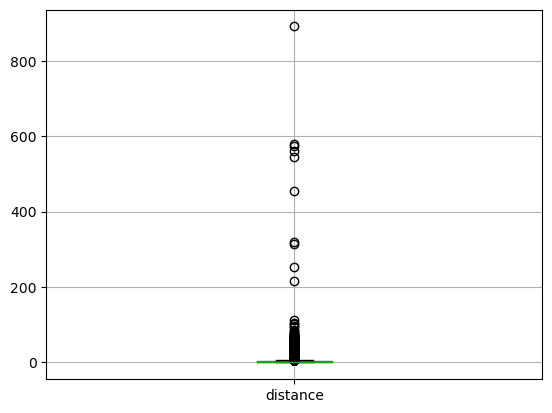

In [23]:
#Visualize distance outliers
df.boxplot(column='distance', return_type='axes');

In [24]:
df = df[(df.distance < 200)]

In [25]:
#Create speed feature(trip duration converted in log scale see above so speed might be called km/s(but not sure))
df['speed'] = df.distance / df.trip_duration

In [26]:
print(df)

                id  passenger_count  pickup_longitude  pickup_latitude  \
0        id2875421                1        -73.982155        40.767937   
1        id2377394                1        -73.980415        40.738564   
2        id3858529                1        -73.979027        40.763939   
3        id3504673                1        -74.010040        40.719971   
4        id2181028                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639  id2376096                4        -73.982201        40.745522   
1458640  id1049543                1        -74.000946        40.747379   
1458641  id2304944                1        -73.959129        40.768799   
1458642  id2714485                1        -73.982079        40.749062   
1458643  id1209952                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  N  Y  1  2  \
0               -73.964630         4

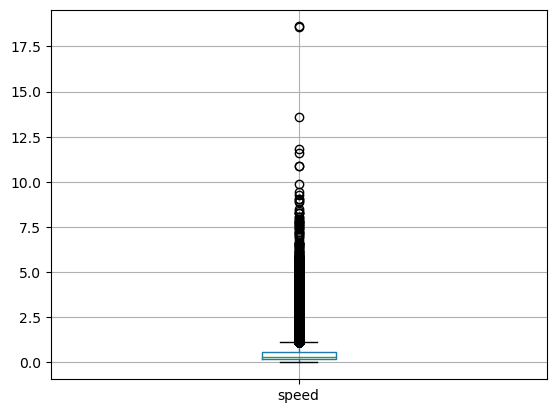

In [27]:
#Visualize speed feature
df.boxplot(column='speed', return_type='axes');

In [28]:
#Remove speed outliers
df = df[(df.speed < 30)]
df.drop(['speed'], axis=1, inplace=True)


In [29]:
print(df)

                id  passenger_count  pickup_longitude  pickup_latitude  \
0        id2875421                1        -73.982155        40.767937   
1        id2377394                1        -73.980415        40.738564   
2        id3858529                1        -73.979027        40.763939   
3        id3504673                1        -74.010040        40.719971   
4        id2181028                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639  id2376096                4        -73.982201        40.745522   
1458640  id1049543                1        -74.000946        40.747379   
1458641  id2304944                1        -73.959129        40.768799   
1458642  id2714485                1        -73.982079        40.749062   
1458643  id1209952                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  N  Y  1  2  \
0               -73.964630         4

/tmp/ipykernel_20/3998984853.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');


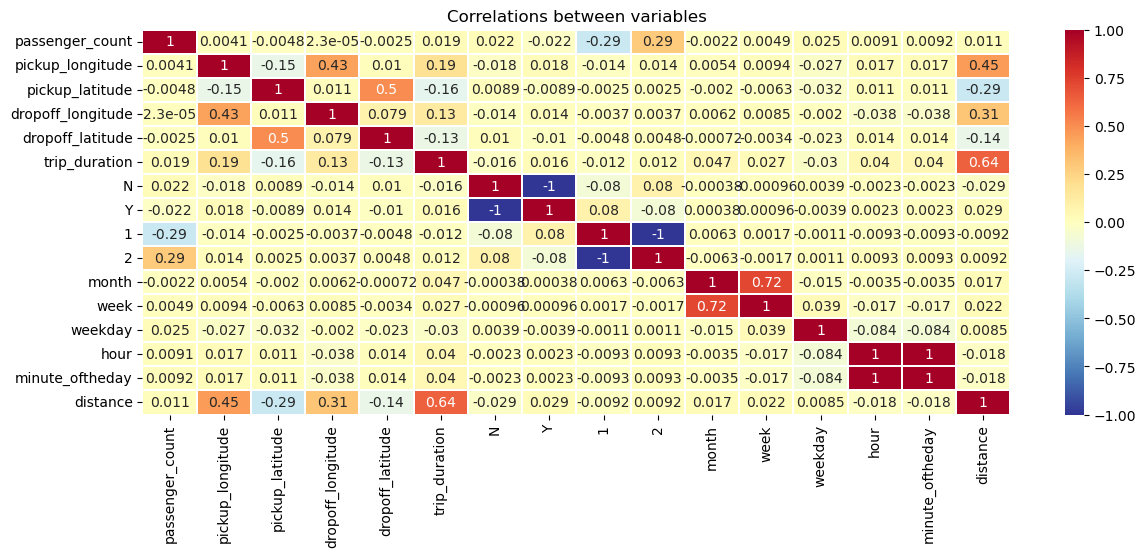

In [30]:
#Correlations between variables
fig, ax = plt.subplots(figsize=(14,5))  
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

In [31]:
#Split the labeled data frame into two sets: features and target
y = df["trip_duration"]
df.drop(["trip_duration"], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
X = df

X.shape, y.shape

((1455970, 15), (1455970,))

In [32]:
#Split the labeled data frame into two sets to train then test the models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1164776, 15), (1164776,), (291194, 15), (291194,))

In [33]:
print(df)


         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  N  Y  1  2  month  week  \
0               -73.964630         40.765602  1  0  0  1      3    11   
1               -73.999481         40.731152  1  0  1  0      6    23   
2               -74.0053

In [34]:
print(max(df.distance))



112.54887160462278


In [35]:
"""import pandas as pd

# Create a dictionary with column names as keys and lists as values
data = {
    'Column1': [1, 2, 1, 2, 1],
    'Column2': ['A', 'B', 'C', 'D', 'E'],
    'Column3': [True, False, True, False, True],
    'Column4': [1.23, 4.56, 7.89, 0.12, 3.45]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)
"""

"import pandas as pd\n\n# Create a dictionary with column names as keys and lists as values\ndata = {\n    'Column1': [1, 2, 1, 2, 1],\n    'Column2': ['A', 'B', 'C', 'D', 'E'],\n    'Column3': [True, False, True, False, True],\n    'Column4': [1.23, 4.56, 7.89, 0.12, 3.45]\n}\n\n# Create the DataFrame\ndf = pd.DataFrame(data)\n\n# Print the DataFrame\nprint(df)\n"

In [36]:
import pandas as pd
import networkx as nx

def create_homogeneous_graph_from_dataframe(dataframe):
    # Create an empty graph
    graph = nx.Graph()

    # Iterate over the rows in the DataFrame
    for i in range(len(dataframe)):
        # Get the node values from the current row
        node_values = dataframe.iloc[i].values
        print(node_values)
        # Add the node to the graph with its values as attributes
        node_id = i + 1  # Node ID starts from 1
        attributes = {str(j): value for j, value in enumerate(node_values)}
        graph.add_node(node_id, **attributes)

        # Connect nodes between consecutive rows
        if i > 0:
            prev_node_id = i  # ID of the previous node
            graph.add_edge(prev_node_id, node_id)

    return graph

# Assuming you already have a DataFrame object named 'df'

# Create the homogeneous graph from the DataFrame
homogeneous_graph = create_homogeneous_graph_from_dataframe(df.head(5))

# Print the node attributes
for node in homogeneous_graph.nodes(data=True):
    print(f"Node {node[0]} attributes: {node[1]}")
    print(node[0])
    print(node[1])

# You can now use the homogeneous_graph object for further analysis or visualization


[ 1.00000000e+00 -7.39821548e+01  4.07679367e+01 -7.39646301e+01
  4.07656021e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  3.00000000e+00  1.10000000e+01  0.00000000e+00
  1.70000000e+01  1.04400000e+03  1.49852078e+00]
[  1.         -73.98041534  40.73856354 -73.9994812   40.73115158
   1.           0.           1.           0.           6.
  23.           6.           0.          43.           1.80550717]
[  1.         -73.97902679  40.7639389  -74.00533295  40.71008682
   1.           0.           0.           1.           1.
   3.           1.          11.         695.           6.3850985 ]
[ 1.00000000e+00 -7.40100403e+01  4.07199707e+01 -7.40122681e+01
  4.07067184e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  4.00000000e+00  1.40000000e+01  2.00000000e+00
  1.90000000e+01  1.17200000e+03  1.48549842e+00]
[  1.         -73.97305298  40.79320908 -73.97292328  40.78252029
   1.           0.           0.           1.           3.
  12

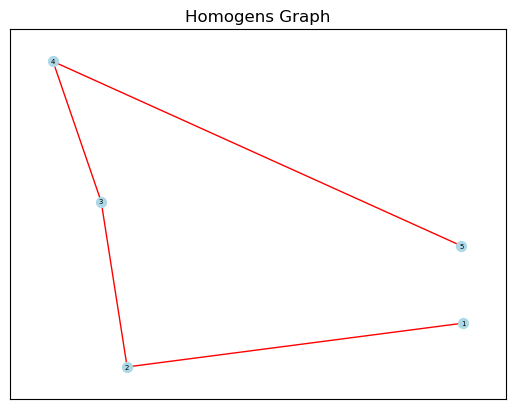

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    # Create the layout for the graph
    pos = nx.random_layout(graph)

    # Draw the nodes
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=50)

    # Draw the edges
    nx.draw_networkx_edges(graph, pos, edge_color='red')

    # Draw the labels (node names)
    nx.draw_networkx_labels(graph, pos, font_size=5, font_color='black')

    # Set the plot titeoule
    plt.title('Homogens Graph')

    # Display the graph
    plt.show()

# Assuming you already have a graph object named 'homogeneous_graph'

# Visualize the graph
visualize_graph(homogeneous_graph)


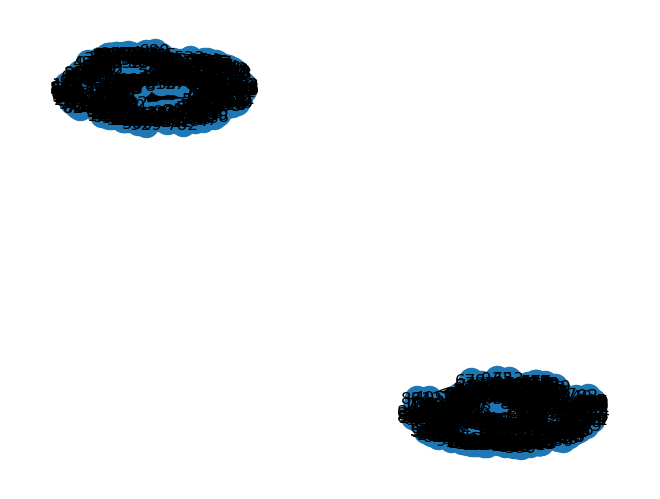

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_homogeneous_graph_from_dataframe(dataframe):
    # Create an empty graph
    graph = nx.Graph()

    # Iterate over the rows in the DataFrame
    for i in range(len(dataframe)):
        # Get the node values from the current row
        node_values = dataframe.iloc[i].values
        #print(f"value of i {i}")
        # Extract the values of columns '1' and '2' for the current row
        column1_value = node_values[7]
        column2_value = node_values[8]
        #print(column1_value)
        #print(column2_value)
        # Add the node to the graph with its value as the row number
        node_id = i   # Node ID starts from 1
        graph.add_node(node_id, value=i)
        #print("separate")
        # Connect nodes based on conditions
        for j in range(i+1,len(dataframe)):
            prev_node_id = j # ID of the previous node
            prev_node_values = dataframe.iloc[j].values
            prev_column1_value = prev_node_values[7]
            prev_column2_value = prev_node_values[8]
            #print(prev_column1_value)
            #print(prev_column2_value)
            
            if prev_column1_value == column1_value and prev_column2_value == column2_value:
                    #print("yes")
                    graph.add_edge(prev_node_id, node_id)

    return graph

# Assuming you already have a DataFrame object named 'df'

# Create the homogeneous graph from the DataFrame
homogeneous_graph = create_homogeneous_graph_from_dataframe(df.head(1000))

# Visualize the graph
nx.draw(homogeneous_graph, with_labels=True)
plt.show()


In [39]:
print(df.head(10))

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude  N  Y  1  2  month  week  weekday  hour  minute_oftheday  \
0         40.765602  1  0  0  1      3    11        0    17             1044   
1  